$$
a_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(k x) dx
$$
$$
b_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(k x) dx
$$
$$
\lim \limits_{n \rightarrow \infty} \frac{a_0}{2} + \sum_{k=1}^{n} a_k \cos(kx)+b_k \sin(kx)
$$

/home/anonymous/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


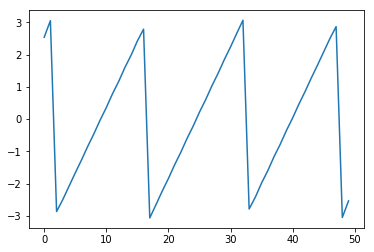

In [62]:
%matplotlib inline
from scipy import integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

# Setting n.
n = 100

# Defining f(x)
def f(x):
    return x

# Defining function for calculating a_k
def int_cos(x, k):
    return f(x) * np.cos(x * k)

def calc_a_k(k):
    tmp = integrate.quad(int_cos, -np.pi, np.pi, args=(k,))
    return (1 / np.pi) * tmp[0]

# Defining function for calculating b_k
def int_sin(x, k):
    return f(x) * np.sin(x * k)

def calc_b_k(k):
    tmp = integrate.quad(int_sin, -np.pi, np.pi, args=(k,))
    return (1 / np.pi) * tmp[0]

# Calculating a_k
a_k = []
for k in range(0, n):
    a_k.append(calc_a_k(k))

#print("a_k = {}".format(a_k))

# Calculating b_k.
b_k = []
for k in range(0, n):
    b_k.append(calc_b_k(k))

#print("b_k = {}".format(b_k))

# Calculating the fourier transformation
def fourier_transformation(x):
    result = a_k[0] / 2
    for k in range(0, n):
        result = result + a_k[k] * np.cos(k * x) + b_k[k] * np.sin(k * x)
    return result

# Plotting Fourier Transformation
x = np.linspace(-10, 10)
plt.plot(fourier_transformation(x))
plt.show()